In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [3]:
# Lendo o csv
df = pd.read_csv('../FC26.csv')

C:\Users\guilh\AppData\Local\Temp\ipykernel_15228\2267802077.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../FC26.csv')


In [4]:
df[df.duplicated()].index

Index([], dtype='int64')

In [5]:
# Exibir todas as colunas
pd.set_option('display.max_columns', None)
print(f"Total de colunas: {len(df.columns)}")
print("\nColunas:")
print(df.columns.tolist())

Total de colunas: 110

Colunas:
['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_ac

In [6]:
# Remover colunas indesejadas

df.drop(columns=['player_id', 'player_url', 'short_name', 'long_name',
 'fifa_version', 'fifa_update', 'fifa_update_date', 'international_reputation', 'value_eur', 'wage_eur',
 'club_team_id', 'club_name', 'club_jersey_number',
 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year',
 'nationality_id', 'nationality_name', 'nation_team_id',
 'nation_position', 'nation_jersey_number', 'player_face_url',
 'player_tags', 'player_traits', 'league_name', 'club_position', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 
 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 
 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 
 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'league_id', 'league_level', 'real_face', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'release_clause_eur', 'dob', 'body_type'],
 inplace=True, errors='ignore')

In [7]:
# Tirando os goleiros do dataframe

df = df[df['player_positions'] != 'GK'].copy()

In [8]:
# Vendo as colunas novamente

pd.set_option('display.max_columns', None)
print(f"Total de colunas: {len(df.columns)}")
print("\nColunas:")
print(df.columns.tolist())

Total de colunas: 45

Colunas:
['player_positions', 'overall', 'potential', 'age', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']


In [9]:
df.isna().sum()

player_positions                   0
overall                            0
potential                          0
age                                0
height_cm                          0
weight_kg                          0
preferred_foot                     0
weak_foot                          0
skill_moves                        0
work_rate                      16343
pace                               0
shooting                           0
passing                            0
dribbling                          0
defending                          0
physic                             0
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
skill_dribbling                    0
skill_curve                        0
skill_fk_accuracy                  0
skill_long_passing                 0
skill_ball_control                 0
movement_acceleration              0
m

In [10]:
# Coluna work_rate é completamente nula
df.drop(columns=['work_rate'], inplace=True, errors='ignore')

In [11]:
df.dtypes

player_positions                object
overall                          int64
potential                        int64
age                              int64
height_cm                        int64
weight_kg                        int64
preferred_foot                  object
weak_foot                        int64
skill_moves                      int64
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration    

In [12]:
# Transformando player_positions e preferred_foot em categóricas
df['preferred_foot'] = df['preferred_foot'].replace({'Left': 0, 'Right': 1}).astype(int)

C:\Users\guilh\AppData\Local\Temp\ipykernel_15228\4157758495.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['preferred_foot'] = df['preferred_foot'].replace({'Left': 0, 'Right': 1}).astype(int)


In [13]:
df['preferred_foot'].unique()

array([1, 0])

In [14]:
# Aqui comecei a pensar como lidar com as posições
df['player_positions'].unique()

array(['CAM, CM', 'CM, CDM, RB', 'CDM, RB, CM', 'RB, RM', 'CM', 'CDM, CM',
       'LB, LM', 'CM, CDM', 'ST, LM, CAM', 'ST', 'CAM, CM, ST',
       'CM, CDM, CAM', 'RB, CM, RM', 'RM, RW', 'RB, LB, RM', 'LM, LW',
       'RW, RM', 'ST, RW, CAM', 'CM, CAM', 'LW, RW, LM', 'LM, LB, LW',
       'RB', 'CM, CAM, LM', 'CM, ST', 'CB, LB, LM', 'LM, RM, LW',
       'ST, LW, LM', 'CAM, CM, RM', 'CM, CAM, CDM', 'CM, CDM, LB',
       'LB, CB, LM', 'LM, RM, CAM, LB', 'LM, RM, CAM, LW', 'CB, CDM, CM',
       'CAM, LM, CM', 'CM, LW, LM', 'RW, LW, RM', 'RW, RM, ST',
       'CAM, LM, CM, ST', 'LB', 'CDM, CM, CB', 'CAM, CM, CDM',
       'CM, RB, RM, CAM', 'CM, RW, CAM', 'CM, RM, CDM, CAM',
       'CAM, ST, CM', 'LM, CM, CDM, LW', 'LB, RB, LM', 'ST, CAM',
       'CM, LM, CAM', 'CM, CAM, RM', 'LW, ST, RW, LM', 'CB', 'CB, LB',
       'LM, ST, LW', 'CAM, LW, CM', 'CAM, CM, LM', 'RB, CB, RM',
       'CAM, RM, ST', 'CAM, ST', 'LB, RB, RM, LM', 'CM, RM, CAM',
       'LM, CM, LW', 'LB, CM, RB, LM', 'RB, CDM, CM, RM'

In [15]:
# df apenas para visualização
visualizacao = pd.read_csv('../FC26.csv')

C:\Users\guilh\AppData\Local\Temp\ipykernel_15228\3886859400.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  visualizacao = pd.read_csv('../FC26.csv')


In [16]:
jogadores = ['J. Frimpong', 'M. Salah', 'Amad']
condicao = visualizacao['short_name'].isin(jogadores)
colunas_desejadas = ['short_name', 'player_positions']


print(visualizacao.loc[condicao, colunas_desejadas])


        short_name player_positions
21        M. Salah           RM, RW
310    J. Frimpong       RB, RM, RW
948           Amad  CAM, RW, RM, CM
16344     M. Salah       LB, LW, LM


In [17]:
''' 
Percebi que os jogadores podem ter (e geralmente têm) mais de 1 posição, nesse caso, extrairei as 2 primeiras posições (que são as 2 principais)
e usarei isso mais tarde pra criar as macro-posições.
'''

# Função para extrair posições
def extract_positions(pos_str):
    if not isinstance(pos_str, str):
        return None, None
    parts = [p.strip() for p in pos_str.split(',')]
    main = parts[0] if len(parts) >= 1 else None
    secondary = parts[1] if len(parts) >= 2 else None
    return main, secondary

In [18]:
df[['main_position', 'secondary_position']] = df['player_positions'].apply(
    lambda x: pd.Series(extract_positions(x))
)

In [19]:
# Criação das Macro-Posições
def get_macro_position(pos):
    if pos in ['CB','LB', 'RB']:
        return 'Defender'
    elif pos in ['CDM', 'CM', 'CAM']:
        return 'Midfielder'
    elif pos in ['LM', 'RM', 'LW', 'RW']:
        return 'Winger'
    elif pos in ['ST']:
        return 'Striker'
    else:
        return None

In [20]:
# Aplicar mapeamento
df['macro_position'] = df['main_position'].apply(get_macro_position)
df['macro_position_secondary'] = df['secondary_position'].apply(get_macro_position)

In [21]:
# Checar posições não mapeadas
unmapped_main = pd.Series(df.loc[df['macro_position'].isna(), 'main_position'].unique()).dropna().tolist()
unmapped_sec  = pd.Series(df.loc[df['macro_position_secondary'].isna(), 'secondary_position'].unique()).dropna().tolist()
print("Unmapped main positions:", unmapped_main)
print("Unmapped secondary positions:", unmapped_sec)

Unmapped main positions: []
Unmapped secondary positions: []


In [22]:
print(df['macro_position'].value_counts(dropna=False))

macro_position
Defender      6116
Midfielder    4784
Winger        2909
Striker       2534
Name: count, dtype: int64


In [23]:
df.dtypes

player_positions                object
overall                          int64
potential                        int64
age                              int64
height_cm                        int64
weight_kg                        int64
preferred_foot                   int64
weak_foot                        int64
skill_moves                      int64
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration    

In [24]:
# Label Encoder das posições

le_macro = LabelEncoder()
le_main = LabelEncoder()
le_secondary = LabelEncoder()

df['macro_position_enc'] = le_macro.fit_transform(df['macro_position'].astype(str))
df['main_position_enc'] = le_main.fit_transform(df['main_position'].astype(str))
df['secondary_position_enc'] = le_secondary.fit_transform(df['secondary_position'].astype(str))

In [25]:
df.dtypes

player_positions                object
overall                          int64
potential                        int64
age                              int64
height_cm                        int64
weight_kg                        int64
preferred_foot                   int64
weak_foot                        int64
skill_moves                      int64
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration    

In [26]:
# Criação de features

# Features compostas (índices agregados)
df['feat_offensive_index'] = (df['shooting'] + df['passing'] + df['dribbling']) / 3
df['feat_defensive_index'] = (df['defending'] + df['physic']) / 2
df['feat_technical_index'] = (df['skill_ball_control'] + df['mentality_vision'] + df['attacking_short_passing'] + df['dribbling']) / 4
df['feat_speed_index'] = (df['movement_acceleration'] + df['movement_sprint_speed']) / 2
df['feat_stamina_strength_ratio'] = df['power_stamina'] / (df['power_strength'] + 1e-9)
df['feat_attack_defense_ratio'] = df['feat_offensive_index'] / (df['feat_defensive_index'] + 1e-9)
df['feat_shooting_passing_ratio'] = df['shooting'] / (df['passing'] + 1e-9)
df['feat_aerial_ability'] = (df['power_jumping'] + df['attacking_heading_accuracy']) / 2
df['feat_composure_aggression_ratio'] = df['mentality_composure'] / (df['mentality_aggression'] + 1e-9)

# Mentais e visão de jogo
df['feat_mentality_index'] = (df['mentality_vision'] + df['mentality_positioning'] + df['mentality_composure'] + df['mentality_interceptions']) / 4
df['feat_reaction_positioning_avg'] = (df['movement_reactions'] + df['mentality_positioning']) / 2
df['feat_vision_passing_combo'] = (df['mentality_vision'] + df['attacking_short_passing'] + df['skill_long_passing']) / 3

# Físicas e morfológicas
df['feat_bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
df['feat_bmi'] = df['feat_bmi'].replace([np.inf, -np.inf], np.nan).fillna(df['feat_bmi'].median())
df['feat_power_index'] = (df['power_strength'] + df['power_shot_power'] + df['power_jumping'] + df['power_stamina']) / 4
df['feat_lightweight_flag'] = (df['weight_kg'] < 70).astype(int)

# Perfis por função
df['feat_lateral_score'] = (df['attacking_crossing'] + df['movement_sprint_speed'] + df['power_stamina']) / 3
df['feat_centreback_score'] = (df['mentality_interceptions'] + df['power_strength'] + df['defending_standing_tackle']) / 3
df['feat_defensive_mid_score'] = (df['mentality_interceptions'] + df['power_stamina'] + df['attacking_short_passing'] + df['mentality_vision']) / 4
df['feat_central_mid_score'] = (df['mentality_vision'] + df['attacking_short_passing'] + df['mentality_composure']) / 3
df['feat_winger_score'] = (df['movement_acceleration'] + df['movement_sprint_speed'] + df['attacking_crossing'] + df['dribbling']) / 4
df['feat_striker_score'] = (df['shooting'] + df['mentality_positioning'] + df['power_strength'] + df['attacking_heading_accuracy']) / 4

# Extras simples
df['feat_attack_minus_defense'] = df['feat_offensive_index'] - df['feat_defensive_index']
df['feat_pace_minus_shoot'] = df['feat_speed_index'] - df['shooting']


# Substitui NaN por mediana
feat_cols = [c for c in df.columns if c.startswith('feat_')]
for c in feat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

In [27]:
df.to_csv('players_prepared.csv', index=False)

In [28]:
mapping = df[['main_position_enc','main_position']].drop_duplicates().sort_values('main_position_enc')
print(mapping.reset_index(drop=True))

    main_position_enc main_position
0                   0           CAM
1                   1            CB
2                   2           CDM
3                   3            CM
4                   4            LB
5                   5            LM
6                   6            LW
7                   7            RB
8                   8            RM
9                   9            RW
10                 10            ST


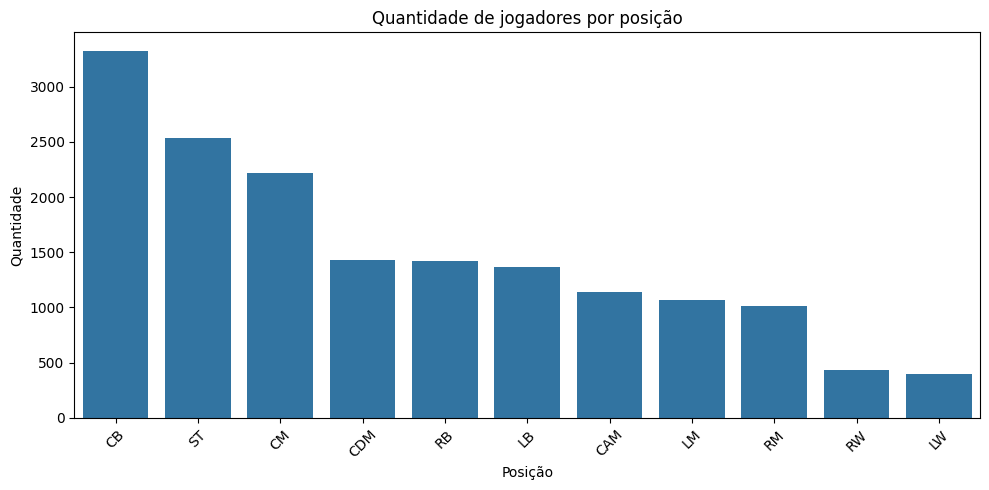

In [30]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='main_position', order=df['main_position'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Quantidade de jogadores por posição")
plt.xlabel("Posição")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()